<a href="https://colab.research.google.com/github/dominoos/Small-Projects/blob/main/ClassScheduleOverlap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In a google sheets list out the schedules of your friends, and find what classes you have in common. See image for an example. Row 1 should be the name of the friend, and all following rows should be the class periods.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


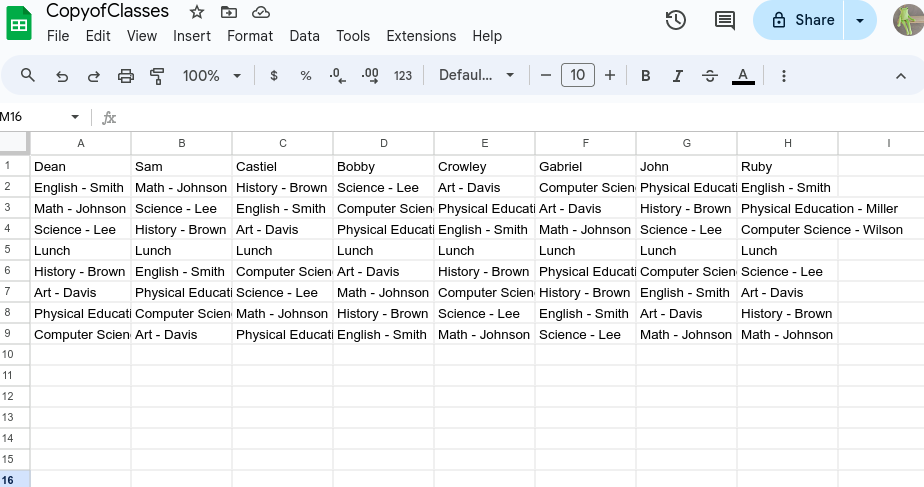

In [3]:
# Import libraries
import gspread
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.auth import default

# Authenticate and create a client
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Open the Google Sheets file (replace 'your_spreadsheet_name' with your file's name)
spreadsheet = gc.open("CopyofClasses").sheet1

# Now you can work with the 'worksheet' object, for example, fetching the data
data = spreadsheet.get_all_values()
#print(data)
allschedules=[]
classes=[]

for name in range(len(data[0])):
  for row in range(9):
    #print(data[row][name])
    classes.append(data[row][name])
  allschedules.append(classes)
  classes=[]

#print(student)


def add_student(classdict, classname, student_name):
    # Check if the class is already in the dictionary
    if classname.strip(" ").lower() in classdict :
        # If it is, add the name to the set
        classdict[classname.strip(" ").lower() ].add(student_name)
    else:
        # If not, create a new set with the student's name
        classdict[classname.strip(" ").lower()]= {student_name}

schedule =[]
sharedclasses={}
for studentnum in range(len(allschedules)):
  schedule = allschedules[studentnum]
  for period in range(1,len(schedule)):
    #print(schedule[period])
    for i in range( len(allschedules)):
      #print(studentnum, " ", allschedules[studentnum][0], " ", i, allschedules[i][0])
      if i != studentnum:
        if schedule[period].strip(" ").lower() == allschedules[i][period].strip(" ").lower():
          key1="Period: " +str(period) + "  Class: "+  str(schedule[period].strip(" ").lower())
          add_student(sharedclasses, key1, allschedules[studentnum][0])
          add_student(sharedclasses, key1, allschedules[i][0])
          #print(schedule[0], " has ", schedule[period], " with ", allschedules[i][0])



sharedclasses
for key in sharedclasses:
  stringnames=""
  print(str.title(key))
  for name in sharedclasses[key]:
    stringnames+=name.capitalize() + "   "
  print(stringnames)
  print()

Period: 1  Class: English - Smith
Dean   Ruby   

Period: 3  Class: Science - Lee
Dean   John   

Period: 4  Class: Lunch
John   Ruby   Bobby   Sam   Castiel   Dean   Gabriel   Crowley   

Period: 5  Class: History - Brown
Dean   Crowley   

Period: 6  Class: Art - Davis
Dean   Ruby   

Period: 5  Class: Computer Science - Wilson
Castiel   John   

Period: 7  Class: History - Brown
Bobby   Ruby   

Period: 2  Class: Physical Education - Miller
Ruby   Crowley   

Period: 8  Class: Math - Johnson
John   Ruby   Crowley   

